# Enochs assigment on machine learning (CO538)
#### Name:Enoch Jozue Krzok
#### ID:22140200

1.Look at the big picture. (do you understand the dataset?)/

2.Get the data. (import the dataset, either locally or from an online source such as Kaggle)/

3.Discover and visualize the data to gain insights. (use matplotlib ‘plots’ and pandas’ descriptive statistics)/

4.Prepare the data for Machine Learning algorithms (cleaning; missing data, illogical values etc)/

5.Select (at least two relevant) models and train them. (Will you use regressors or classifiers? K-NN, K-means, Decision Trees, Random Forests etc? Remember to ‘split’ the dataset into training and test data (and possibly a validation set as well, if required))./

6.Fine-tune your model(s). (visualise the results of the training and see if the parameters need ‘tweaking’)./

7.Run model(s) on Test sets. (Now run the models on ‘test’ dataset to ensure that the results are the same as the ‘train’ results.)./

8.Instead of ‘deploying your system into the real-world’, provide a short evaluation (max. 500 words in a markdown cell) of the models which considers their performance against the goal/target/objective of the scenario. You may also want to consider future aspects of maintenance and scalability if this model was to be ‘deployed in the real world’. 

 

# Setup

In [366]:
# Python ≥3.8 is required
import sys
assert sys.version_info >= (3, 8)

# Scikit-Learn ≥1.0 is required
import sklearn
assert sklearn.__version__ >= "1.0"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Precision options
np.set_printoptions(precision=2)
pd.options.display.float_format = '{:.3f}'.format

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 1.Import Data

In [367]:
filepath = os.path.abspath(os.path.join('..', 'Assigment' , 'AI_index_db.csv'))
print('File path: {}'.format(filepath))
ai = pd.read_csv(filepath)

File path: c:\Users\ejink\OneDrive\Desktop\uni\Y2\S2-Thu-pyth\Assigment\AI_index_db.csv


# 2.Visuaslization of the data

The Dataset is made up of 61 countries and each country has 8 float type data and excluding country 4 object type data as shown below. 

As the sample shows the countries have their name then the Talent, Infrastructure, Operating Environment, Research, Development, Government Strategy and Commercial (each has a number between 0 and 100 (100 is given to the country that is best in that aspect and inversely 0 to the country that is the worst in that aspect)). All of those make up the total score (again 100 for the best country and 0 to the worst). Then we have the region the country is in. Then the cluster is saying what is happing to the AI industry in the country. The income group is how well the people are getting paid. and the political regime is how the politics are done in that country. 

In [368]:
ai

,Country,Talent,Infrastructure,Operating_Environment,Research,Development,Government_Strategy,Commercial,Total_score,Region,Cluster,Income_group,Political_regime
0,United States of America,100.000,94.020,64.560,100.000,100.000,77.390,100.000,100.000,Americas,Power players,High,Liberal democracy
1,China,16.510,100.000,91.570,71.420,79.970,94.870,44.020,62.920,Asia-Pacific,Power players,Upper middle,Closed autocracy
2,United Kingdom,39.650,71.430,74.650,36.500,25.030,82.820,18.910,40.930,Europe,Traditional champions,High,Liberal democracy
3,Canada,31.280,77.050,93.940,30.670,25.780,100.000,14.880,40.190,Americas,Traditional champions,High,Liberal democracy
4,Israel,35.760,67.580,82.440,32.630,27.960,43.910,27.330,39.890,Middle East,Rising stars,High,Liberal democracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Sri Lanka,6.270,34.640,35.790,0.120,0.950,35.570,0.090,6.620,Asia-Pacific,Nascent,Lower middle,Electoral democracy
58,Egypt,1.110,38.840,0.000,2.080,1.540,68.720,0.310,4.830,Middle East,Nascent,Lower middle,Electoral autocracy
59,Kenya,0.750,14.110,29.840,0.070,12.150,7.750,0.310,2.300,Africa,Nascent,Lower middle,Electoral autocracy
60,Nigeria,2.740,0.000,50.100,0.450,2.060,7.750,0.330,1.380,Africa,Nascent,Lower middle,Electoral autocracy


In [369]:
ai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                62 non-null     object 
 1   Talent                 62 non-null     float64
 2   Infrastructure         62 non-null     float64
 3   Operating_Environment  62 non-null     float64
 4   Research               62 non-null     float64
 5   Development            62 non-null     float64
 6   Government_Strategy    62 non-null     float64
 7   Commercial             62 non-null     float64
 8   Total_score            62 non-null     float64
 9   Region                 62 non-null     object 
 10  Cluster                62 non-null     object 
 11  Income_group           62 non-null     object 
 12  Political_regime       62 non-null     object 
dtypes: float64(8), object(5)
memory usage: 6.4+ KB


Some more insight on the data

In [370]:
ai.describe()

,Talent,Infrastructure,Operating_Environment,Research,Development,Government_Strategy,Commercial,Total_score
count,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000
mean,16.803,63.504,66.925,16.610,14.825,57.866,6.172,23.915
std,15.215,20.218,20.000,17.414,19.419,26.252,14.030,15.124
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7.365,55.858,58.108,3.033,1.203,41.030,0.698,14.805
50%,13.445,65.230,69.505,12.930,9.005,63.930,2.585,23.220
75%,24.567,75.948,80.500,25.413,19.980,77.953,5.307,30.488
max,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000


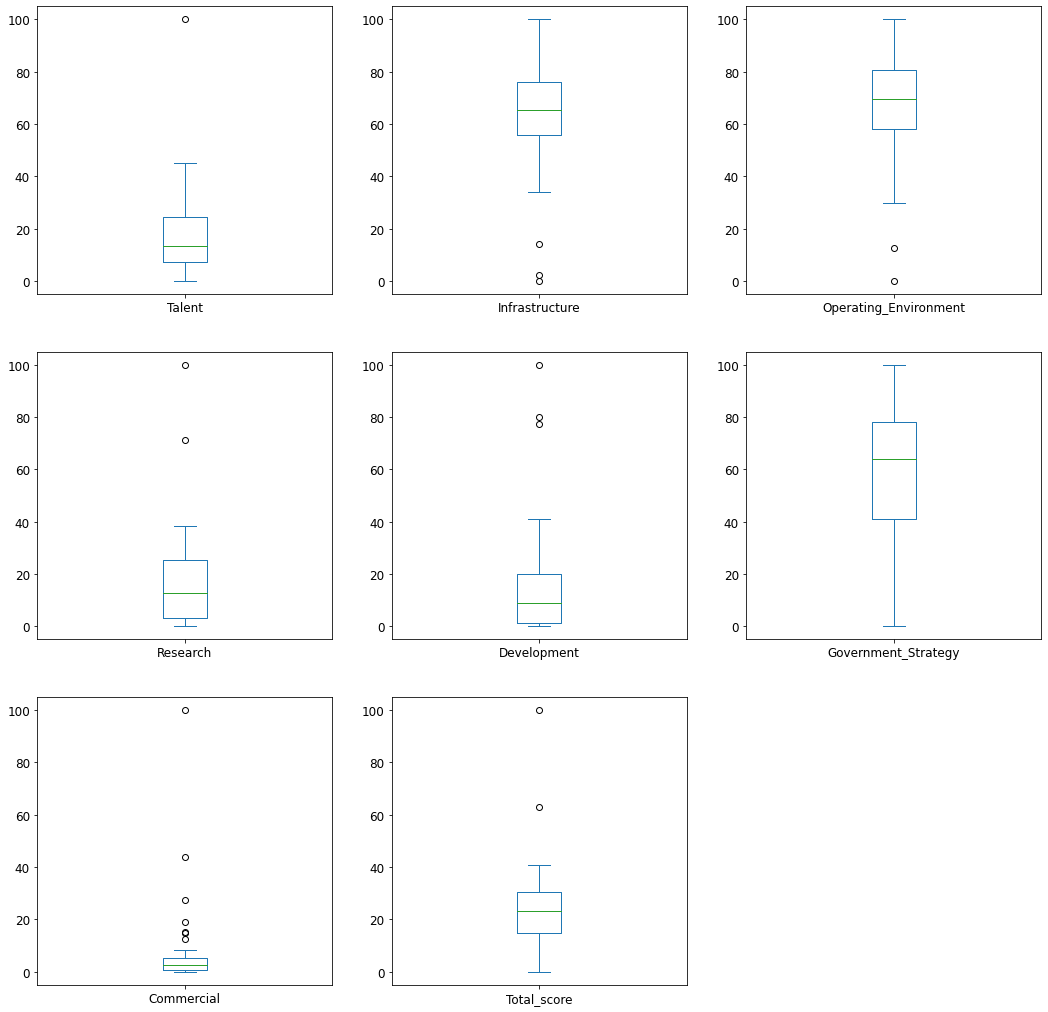

In [371]:
p = ai[
    ['Talent', 'Infrastructure', 'Operating_Environment', 'Research', 'Development', 'Government_Strategy', 'Commercial', 'Total_score']
].plot.box(subplots=True, layout=(3, 3), figsize=(18,18))

In [372]:
ai_graphs = pd.DataFrame(ai, columns= ['Talent', 'Infrastructure', 'Operating_Environment', 'Research', 
                                       'Development', 'Government_Strategy', 'Commercial', 'Total_score'] )


Those graphs below show the corrilation between each float data type colume

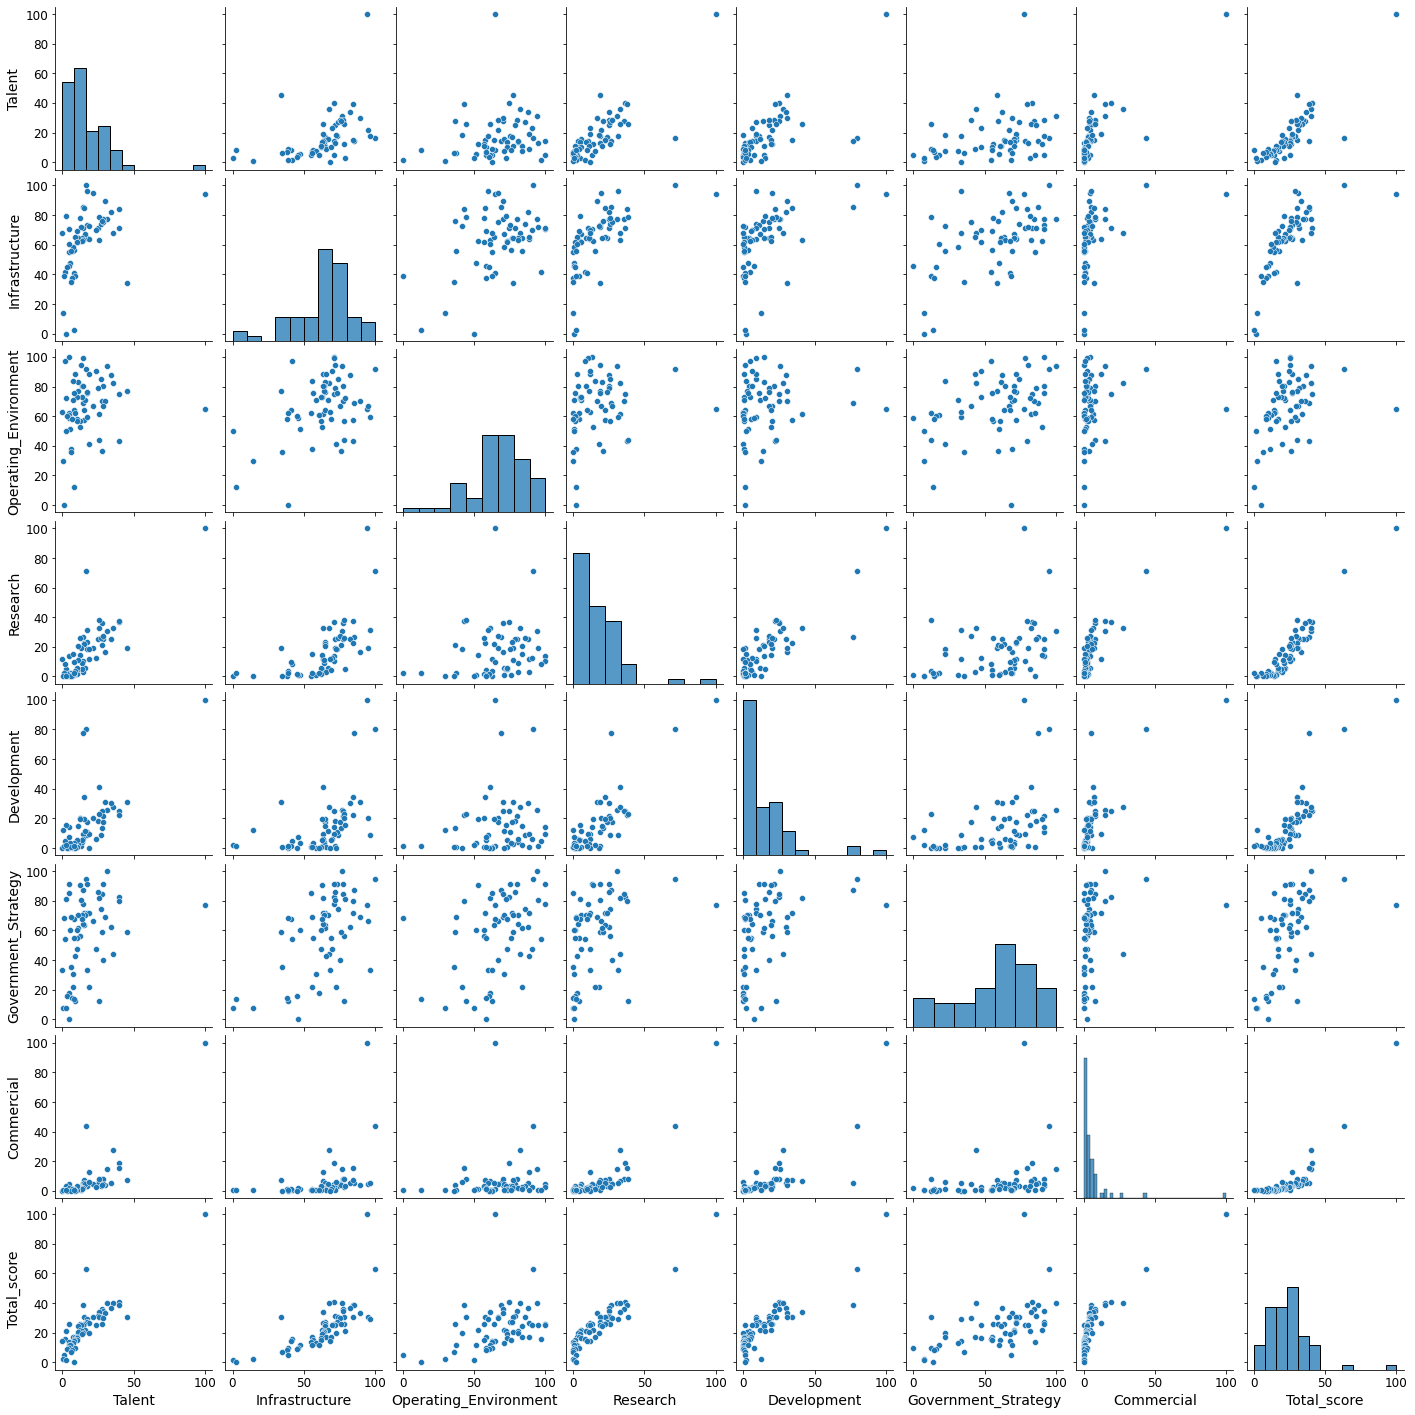

In [373]:
import seaborn as sns
pal = sns.color_palette(n_colors=3)
sns.pairplot(ai_graphs)
plt.show()

# 3.Prepare the Data
Splitting of data

In [374]:
from sklearn.model_selection import train_test_split

# set 1
train_set, test_set = train_test_split(ai, test_size=0.2, random_state=42)

# set 2
train_set2, test_set2 = train_test_split(ai, test_size=0.2, random_state=43)

train_set.shape, test_set.shape, train_set2.shape, test_set2.shape


((49, 13), (13, 13), (49, 13), (13, 13))

In [375]:
test_set

,Country,Talent,Infrastructure,Operating_Environment,Research,Development,Government_Strategy,Commercial,Total_score,Region,Cluster,Income_group,Political_regime
50,Bahrain,4.990,60.390,60.900,2.530,0.000,17.720,0.240,11.790,Middle East,Waking up,High,Closed autocracy
56,Armenia,6.690,37.840,58.400,0.280,0.330,14.400,1.370,8.490,Europe,Waking up,Upper middle,Electoral democracy
0,United States of America,100.000,94.020,64.560,100.000,100.000,77.390,100.000,100.000,Americas,Power players,High,Liberal democracy
57,Sri Lanka,6.270,34.640,35.790,0.120,0.950,35.570,0.090,6.620,Asia-Pacific,Nascent,Lower middle,Electoral democracy
5,Singapore,39.380,84.300,43.150,37.670,22.550,79.820,15.070,38.670,Asia-Pacific,Rising stars,High,Electoral democracy
48,Colombia,4.970,54.800,62.370,0.000,0.890,85.290,0.500,13.850,Americas,Waking up,Upper middle,Electoral democracy
16,India,45.270,33.910,77.300,18.920,30.860,58.830,7.390,30.360,Asia-Pacific,Waking up,Lower middle,Electoral autocracy
12,Finland,24.990,71.600,78.760,25.210,18.320,85.990,4.640,31.360,Europe,Rising stars,High,Liberal democracy
25,Saudi Arabia,4.490,70.800,100.000,13.630,14.380,91.630,4.730,25.600,Middle East,Waking up,High,Closed autocracy
59,Kenya,0.750,14.110,29.840,0.070,12.150,7.750,0.310,2.300,Africa,Nascent,Lower middle,Electoral autocracy


In [376]:
test_set2

,Country,Talent,Infrastructure,Operating_Environment,Research,Development,Government_Strategy,Commercial,Total_score,Region,Cluster,Income_group,Political_regime
52,Indonesia,5.510,47.520,51.180,0.980,3.520,59.990,0.910,11.470,Asia-Pacific,Waking up,Lower middle,Electoral democracy
45,Argentina,8.400,56.150,75.950,1.250,3.190,54.940,0.340,15.240,Americas,Waking up,Upper middle,Electoral democracy
18,Sweden,28.210,75.190,66.770,27.610,17.810,40.350,4.510,29.850,Europe,Waking up,High,Liberal democracy
5,Singapore,39.380,84.300,43.150,37.670,22.550,79.820,15.070,38.670,Asia-Pacific,Rising stars,High,Electoral democracy
37,Lithuania,14.300,63.190,80.670,3.220,6.180,64.280,1.770,19.590,Europe,Waking up,High,Electoral democracy
38,Brazil,13.460,62.610,72.820,4.830,5.070,67.720,1.360,18.890,Americas,Waking up,Upper middle,Electoral democracy
39,Greece,7.620,55.440,83.580,15.120,2.210,22.150,0.920,17.330,Europe,Waking up,High,Liberal democracy
19,Hong Kong,17.560,96.110,59.500,31.510,8.630,33.290,5.300,29.110,Asia-Pacific,Waking up,High,Electoral democracy
55,Morocco,3.360,44.880,60.170,1.460,0.050,15.900,0.100,8.870,Africa,Waking up,Lower middle,Closed autocracy
33,United Arab Emirates,2.650,79.160,72.120,5.130,15.530,81.380,3.220,21.170,Middle East,Waking up,High,Closed autocracy


# Set 1

In [377]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

ai_num = train_set.select_dtypes(include=[np.number])
ai_no_total = ai_num.drop("Total_score", axis=1)
ai_only_total = ai_num["Total_score"].copy()
ai_prepared = num_pipeline.fit_transform(ai_no_total)
ai_prepared.shape

ai_num_test = test_set.select_dtypes(include=[np.number])
ai_test_no_total = ai_num_test.drop("Total_score", axis=1)
ai_test_only_total = ai_num_test["Total_score"].copy()
ai_test_prepared = num_pipeline.fit_transform(ai_test_no_total)
ai_test_prepared.shape


(13, 7)

# Set 2
As one of them didnt have USA (kinda of an outlier, but it wasnt removed as all index values lie on the line of 0-100 and if we removed the 100 the line would shorten and that would then mean the data cant have as high of a total score as it should have) in the test data and one did i wanted to see how much the outcome would diffrenciate so i made 2 sets of training and testing data

In [378]:
ai_num2 = train_set2.select_dtypes(include=[np.number])
ai_no_total2 = ai_num2.drop("Total_score", axis=1)
ai_only_total2 = ai_num2["Total_score"].copy()
ai_prepared2 = num_pipeline.fit_transform(ai_no_total2)

ai_num_test2 = test_set2.select_dtypes(include=[np.number])
ai_test_no_total2 = ai_num_test2.drop("Total_score", axis=1)
ai_test_only_total2 = ai_num_test2["Total_score"].copy()
ai_test_prepared2 = num_pipeline.fit_transform(ai_test_no_total2)

# 4.1.Training model 1
SGDRegressor

In [379]:
from sklearn.linear_model import SGDRegressor

# set 1
sgd_reg = SGDRegressor(
    loss="squared_error", # default cost function (MSE)
    max_iter=1000,   # maximum number of passes over the training data (aka epochs)
    penalty=None, # no regularisation
    eta0=0.05,  # initial learning rate
    tol=1e-3,   # stopping criterion tolerance. stop searching for a minimum 
                # (or maximum) once some tolerance is achieved, i.e. 
                # once you're close enough.
)

# set 2
sgd_reg2 = SGDRegressor(
    loss="squared_error", # default cost function (MSE)
    max_iter=1000,   # maximum number of passes over the training data (aka epochs)
    penalty=None, # no regularisation
    eta0=0.05,  # initial learning rate
    tol=1e-3,   # stopping criterion tolerance. stop searching for a minimum 
                # (or maximum) once some tolerance is achieved, i.e. 
                # once you're close enough.
)

# set 1
sgd_reg.fit(ai_prepared, ai_only_total)
print('SGD Regressor intercept: {}'.format(sgd_reg.intercept_))
print('SGD Regressor coefficient: {}'.format(sgd_reg.coef_))

# set 2
sgd_reg2.fit(ai_prepared2, ai_only_total2)
print('SGD Regressor intercept 2: {}'.format(sgd_reg2.intercept_))
print('SGD Regressor coefficient 2: {}'.format(sgd_reg2.coef_))

SGD Regressor intercept: [23.27]
SGD Regressor coefficient: [2.22 2.57 1.84 3.22 2.35 1.16 1.71]
SGD Regressor intercept 2: [24.01]
SGD Regressor coefficient 2: [3.64 2.87 1.96 3.94 2.82 1.23 3.61]


In [380]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import seaborn as sns

@ignore_warnings(category=ConvergenceWarning)
def plot_learning_curves(model, X, y, max_training_samples=None):
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2
    )
    train_errors, val_errors = [], []
    # for training set size from 1 to max_training_samples
    for m in range(1, min(len(X_train), max_training_samples)):
        # train a new model
        model.fit(X_train[:m], y_train[:m])
        # make predictions on the training and validation set
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        # compute the MSE on the training and validation set
        train_errors.append(
            mean_squared_error(y_train[:m], y_train_predict)
        )
        val_errors.append(
            mean_squared_error(y_val, y_val_predict)
        )
    fig, ax = plt.subplots(figsize=(16,10))
    # plot our performance metric (i.e. the RMSE)
    sns.lineplot(data=np.sqrt(train_errors), linewidth=2, label="train", ax=ax)
    sns.lineplot(data=np.sqrt(val_errors), linewidth=2, label="val", ax=ax)

# Set 1

CPU times: total: 62.5 ms
Wall time: 71.5 ms


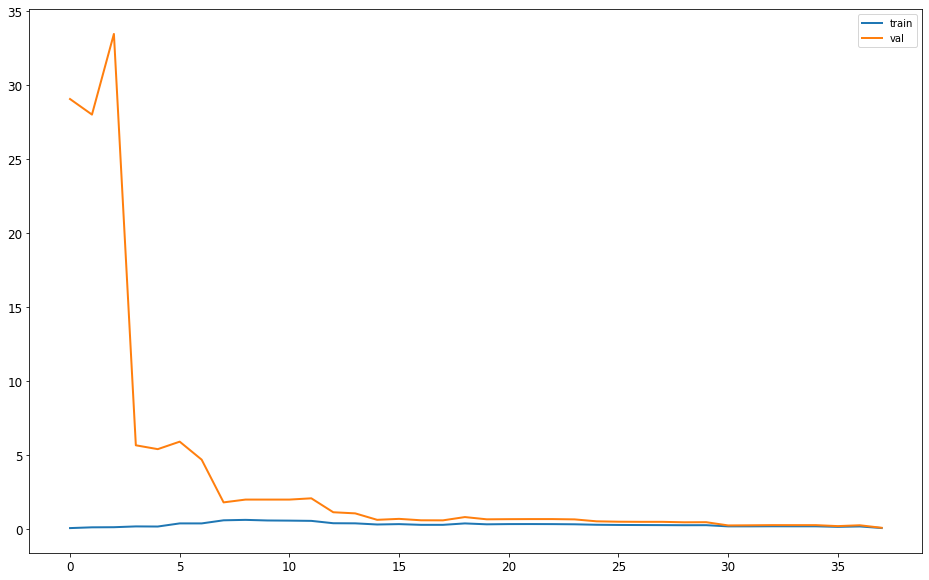

In [381]:
%%time
plot_learning_curves(sgd_reg, ai_prepared, ai_only_total, max_training_samples=500) 

# Set 2

CPU times: total: 62.5 ms
Wall time: 65 ms


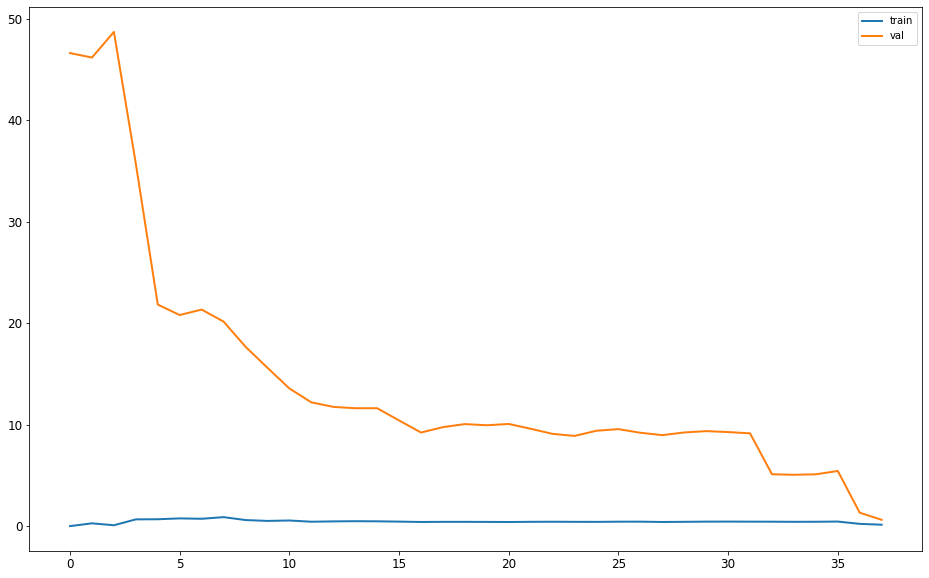

In [382]:
%%time
plot_learning_curves(sgd_reg2, ai_prepared2, ai_only_total2, max_training_samples=500) 

# Set 1

In [383]:
ai_predictions = sgd_reg.predict(ai_prepared)
sgd_mse = mean_squared_error(ai_only_total, ai_predictions)
sgd_rmse = np.sqrt(sgd_mse)
sgd_rmse

0.05159884629553832

# Set 2

In [384]:
ai_predictions2 = sgd_reg2.predict(ai_prepared2)
sgd_mse2 = mean_squared_error(ai_only_total2, ai_predictions2)
sgd_rmse2 = np.sqrt(sgd_mse2)
sgd_rmse2

0.3230589500460386

The above is tested on the train data and the below is going to be tested on the test data.

# Set 1 test

# on model 1

In [385]:
ai_test_predictions = sgd_reg.predict(ai_test_prepared)
sgd_mse = mean_squared_error(ai_test_only_total, ai_test_predictions)
sgd_rmse = np.sqrt(sgd_mse)
sgd_rmse

12.446535289419458

In [386]:
ai_test_predictions, ai_test_only_total

(array([15.85, 12.77, 58.07, 10.97, 29.58, 17.71, 24.43, 27.9 , 26.59,
         7.46, 24.36, 29.67, 17.04]),
 50    11.790
 56     8.490
 0    100.000
 57     6.620
 5     38.670
 48    13.850
 16    30.360
 12    31.360
 25    25.600
 59     2.300
 30    24.450
 9     34.420
 47    14.390
 Name: Total_score, dtype: float64)

Welp that sucks but the model was trained where a few of the 100 were gone and then when tested the data suddenly had a few 100 in unexpected places (like for example the total score). So the rmse kind of makes sense. All were give or take 10 but the 3rd one was 45 ish off.

# on model 2

In [387]:
ai_test_predictions2 = sgd_reg2.predict(ai_test_prepared)
sgd_mse = mean_squared_error(ai_test_only_total, ai_test_predictions2)
sgd_rmse = np.sqrt(sgd_mse)
sgd_rmse

7.9990876144999365

In [388]:
ai_test_predictions2, ai_test_only_total

(array([13.89, 10.68, 72.89,  8.61, 32.31, 15.75, 26.47, 28.96, 26.15,
         4.84, 24.23, 31.21, 15.58]),
 50    11.790
 56     8.490
 0    100.000
 57     6.620
 5     38.670
 48    13.850
 16    30.360
 12    31.360
 25    25.600
 59     2.300
 30    24.450
 9     34.420
 47    14.390
 Name: Total_score, dtype: float64)

Unsiprisingly it did better on the 2 model which had some of the training data the same as the test data. Also the training data had the 100 so it was ready to recieve them. However the rmse is still pretty high. Mostly like 5 off but the 100 one is 28 off.

# Set 2 test

# on model 1

In [389]:
ai_test_predictions3 = sgd_reg.predict(ai_test_prepared2)
sgd_mse2 = mean_squared_error(ai_test_only_total2, ai_test_predictions3)
sgd_rmse2 = np.sqrt(sgd_mse2)
sgd_rmse2

1.170923502173003

In [390]:
ai_test_predictions3, ai_test_only_total2

(array([ 9.06, 14.28, 29.68, 39.41, 19.29, 18.16, 17.11, 29.55,  6.61,
        21.17, 28.69, 31.05, 38.34]),
 52   11.470
 45   15.240
 18   29.850
 5    38.670
 37   19.590
 38   18.890
 39   17.330
 19   29.110
 55    8.870
 33   21.170
 22   26.600
 14   30.730
 6    38.600
 Name: Total_score, dtype: float64)

This one was kind of a suprise but when you think about it it wasnt trained on 100 and it also didnt have the 100 in the test set, and also some data in training and test was duplicate, which made it easyier to predict, which in turn made it have a lowish rmse. All were give or take 3.

# on model 2

In [391]:
ai_test_predictions4 = sgd_reg2.predict(ai_test_prepared2)
sgd_mse2 = mean_squared_error(ai_test_only_total2, ai_test_predictions4)
sgd_rmse2 = np.sqrt(sgd_mse2)
sgd_rmse2

4.68309760602124

In [392]:
ai_test_predictions4, ai_test_only_total2

(array([ 5.48, 11.39, 33.58, 48.71, 18.07, 16.69, 15.48, 32.26,  2.45,
        19.2 , 32.07, 33.65, 42.55]),
 52   11.470
 45   15.240
 18   29.850
 5    38.670
 37   19.590
 38   18.890
 39   17.330
 19   29.110
 55    8.870
 33   21.170
 22   26.600
 14   30.730
 6    38.600
 Name: Total_score, dtype: float64)

This one was good pretty good. As the values between the training and test date didnt have duplicates the results were very good. So the rmse was not low or high somewhere average. Only around 5ish off and one 10ish off.

# 4.1.Training model 2

# Training
Linear regression

In [393]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lin_reg1 = LinearRegression().fit(ai_prepared, ai_only_total)
lin_reg2 = LinearRegression().fit(ai_prepared2, ai_only_total2)

ai_predictions = lin_reg1.predict(ai_prepared)
lin_mse1 = mean_squared_error(ai_only_total, ai_predictions)

ai_predictions2 = lin_reg2.predict(ai_prepared2)
lin_mse2 = mean_squared_error(ai_only_total2, ai_predictions2)

In [394]:
lin_reg1.intercept_, lin_reg1.coef_

(23.27367346938776, array([2.21, 2.61, 1.83, 3.19, 2.35, 1.15, 1.74]))

CPU times: total: 62.5 ms
Wall time: 61 ms


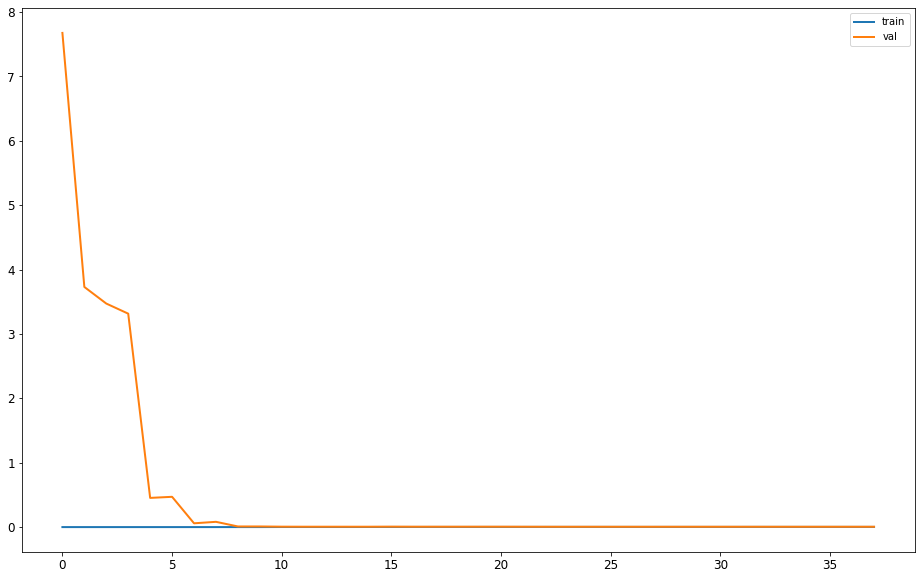

In [408]:
%%time
plot_learning_curves(lin_reg1, ai_prepared, ai_only_total, max_training_samples=500) 

In [395]:
lin_reg2.intercept_, lin_reg2.coef_

(24.01204081632653, array([3.69, 2.82, 1.96, 4.18, 2.64, 1.24, 3.53]))

CPU times: total: 62.5 ms
Wall time: 72 ms


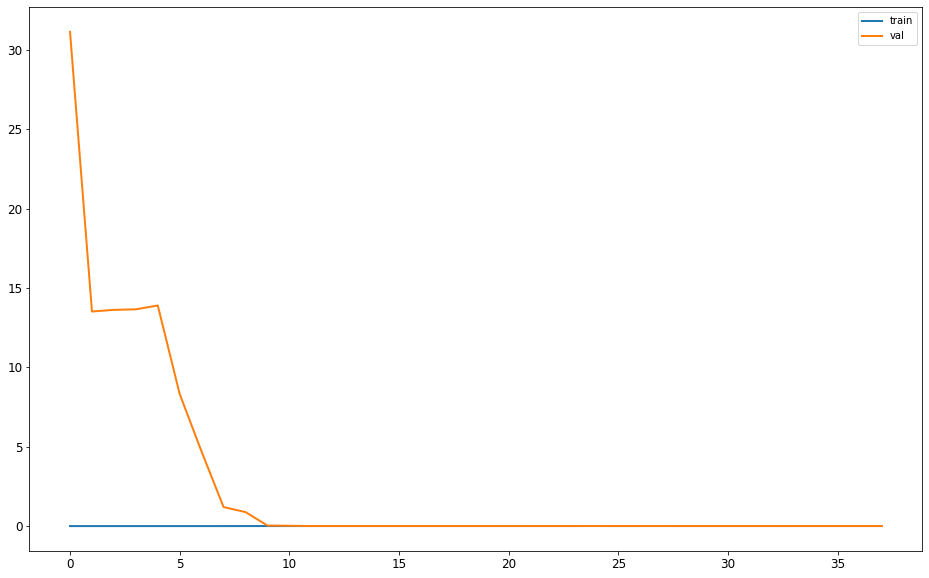

In [407]:
%%time
plot_learning_curves(lin_reg2, ai_prepared2, ai_only_total2, max_training_samples=500) 

# Testing

In [396]:
# set 1 on model 1

ai_test_predictions = lin_reg1.predict(ai_test_prepared)
lin_mse1 = mean_squared_error(ai_test_only_total, ai_test_predictions)

# set 1 on model 2

ai_test_predictions2 = lin_reg2.predict(ai_test_prepared)
lin_mse2 = mean_squared_error(ai_test_only_total, ai_test_predictions2)

# set 2 on model 2

ai_test_predictions3 = lin_reg1.predict(ai_test_prepared2)
lin_mse3 = mean_squared_error(ai_test_only_total2, ai_test_predictions3)

# set 2 on model 2

ai_test_predictions4 = lin_reg2.predict(ai_test_prepared2)
lin_mse4 = mean_squared_error(ai_test_only_total2, ai_test_predictions4)

# Set 1

## on model 1

In [403]:
lin_rmse1 = np.sqrt(lin_mse1)
lin_rmse1

12.425786643196385

## on model 2

In [404]:
lin_rmse2 = np.sqrt(lin_mse2)
lin_rmse2

7.763711565223348

# Set 2

## on model 1

In [405]:
lin_rmse3 = np.sqrt(lin_mse3)
lin_rmse3

1.160158204894688

## on model 2

In [406]:
lin_rmse4 = np.sqrt(lin_mse4)
lin_rmse4

5.063847364866671

Basicaly a repeat of what happened before in SGB regressor.

# 5.conclusion

We have pretty similar results from SGD regressor and linear regressor and the values only hugely diffrentiated due to the sets used for training and testing not the models themselves.

This show that not only a good model is need but also the data must be split in a good way. And when ouliers are removed then the data behaves in a better more predictable way.

If i did this all over again then i would have mabye removed all the 0 values and 100 values as those in theory cannot be intruduced to the dataset as they are unique (only one country can have them). If you would add them then you would have to change the entire dataset.